# California Housing Price Analysis  
**Course:** MATH 120  
**Author:** Elliot Wiley  
**Dataset:** Zillow California Housing Data  

This notebook explores housing price trends across California using Zillow data.  
We will clean the data, visualize trends, and build a simple regression model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

If you choose to add the file to your google drive use the below:

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#file_path = '/content/drive/My Drive/Fall 120/data_raw/zillow_housing_raw.csv'
#df = pd.read_csv(file_path)

If not, use this code:
(This project uses publicly available Zillow Home Value Index (ZHVI) data, loaded directly from Zillow’s research website to ensure full reproducibility without reliance on local files or Google Drive which allows the code to simply be re-run when new data is added)

In [ ]:
url = "https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31,2025-11-30
0,102001,0,United States,country,NaN,121365.463017,121578.983773,121843.780950,122411.718918,123065.347427,...,360639.085047,360365.882152,359841.918311,359161.728607,358549.348441,358126.082695,357900.244881,358139.907469,358570.726255,359241.248814
1,394913,1,"New York, NY",msa,NY,217048.914950,217971.250375,218902.128288,220788.447146,222741.795647,...,683063.089259,684751.535661,687173.496480,688933.036680,690400.936533,691567.341599,692353.209509,693746.473781,696069.806090,699394.634661
2,753899,2,"Los Angeles, CA",msa,CA,218336.580065,219149.069165,220231.296899,222384.566542,224739.568479,...,948074.673902,943052.689223,938798.754881,934095.397500,929804.957480,927250.711189,926195.042763,927236.358557,929617.284624,932886.242451
3,394463,3,"Chicago, IL",msa,IL,151721.660042,151862.110101,152129.599712,152795.047391,153595.500906,...,326483.919256,327320.371223,327914.592965,328201.936285,328558.836926,329388.734181,330373.317156,331691.388829,332981.532008,334511.786740
4,394514,4,"Dallas, TX",msa,TX,126887.587653,126944.103828,127009.074957,127177.798153,127400.255068,...,372494.812737,371001.024231,368886.369472,366484.365155,364134.164489,362129.302053,360775.171809,360131.881806,359785.324832,359523.202747


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 316 entries, RegionID to 2025-11-30
dtypes: float64(311), int64(2), object(3)
memory usage: 2.2+ MB


,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31,2025-11-30
count,895.000000,895.000000,431.000000,432.000000,433.000000,435.000000,437.000000,438.000000,439.000000,440.000000,...,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02
mean,412099.672626,461.751955,108983.836366,109161.069028,109318.214951,110001.960492,110728.065082,111291.646768,112062.104566,112679.780463,...,2.883784e+05,2.883785e+05,2.880450e+05,2.876479e+05,2.873125e+05,2.872338e+05,2.872499e+05,2.875890e+05,2.880914e+05,2.888419e+05
std,78377.355083,268.710532,45913.586190,46024.103470,46210.501886,46864.621861,47448.971859,48058.409132,48767.618939,49493.266509,...,1.737718e+05,1.733384e+05,1.730044e+05,1.725092e+05,1.719163e+05,1.712942e+05,1.709351e+05,1.710781e+05,1.716363e+05,1.723286e+05
min,102001.000000,0.000000,45034.595961,45060.642905,45165.696936,45371.285657,45652.171664,45994.185979,46332.297541,46584.206989,...,4.974522e+04,5.125198e+04,5.163253e+04,5.060904e+04,4.840373e+04,4.582981e+04,4.416668e+04,4.339537e+04,4.377917e+04,4.410232e+04
25%,394546.000000,230.500000,78470.681797,78540.023139,78588.075121,78903.507462,79173.920784,79615.970408,80070.652579,80285.173820,...,1.814516e+05,1.815597e+05,1.816577e+05,1.812053e+05,1.816370e+05,1.820230e+05,1.826452e+05,1.836003e+05,1.840468e+05,1.843273e+05
50%,394795.000000,460.000000,98335.119623,98397.960970,98410.515398,98483.504878,98848.423566,99223.359120,99828.005193,100088.230433,...,2.403168e+05,2.408713e+05,2.403690e+05,2.412938e+05,2.418412e+05,2.425867e+05,2.422640e+05,2.425321e+05,2.431335e+05,2.445040e+05
75%,395044.500000,689.500000,125434.396064,125671.953010,125909.250172,126480.176513,127019.479001,127313.180409,128069.138571,128791.775496,...,3.398297e+05,3.394924e+05,3.394009e+05,3.397525e+05,3.392846e+05,3.390175e+05,3.392600e+05,3.392852e+05,3.396833e+05,3.405611e+05
max,753929.000000,939.000000,354250.809817,356076.587645,358827.088546,366275.642535,374084.995040,383032.632221,390735.739571,400217.422119,...,1.582178e+06,1.570487e+06,1.558644e+06,1.542135e+06,1.525053e+06,1.513488e+06,1.509796e+06,1.514924e+06,1.525298e+06,1.539985e+06


In [ ]:
ca_df = df[df["StateName"] == "CA"]
ca_df.shape

(34, 316)

In [ ]:
ca_df = ca_df.dropna(thresh=int(0.75 * ca_df.shape[1]))
ca_df = ca_df.fillna(method="ffill")

ca_df.isna().sum().head()

/tmp/ipython-input-2298749272.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ca_df = ca_df.fillna(method="ffill")


,0
RegionID,0
SizeRank,0
RegionName,0
RegionType,0
StateName,0


Google drive method:

In [ ]:
#clean_path = "/content/drive/My Drive/Fall 120/data_raw/zillow_california_clean.csv"
#ca_df.to_csv(clean_path, index=False)

Default method:

In [ ]:
ca_df = df[df["StateName"] == "CA"]

Establishing cities for use:

In [ ]:
cities = [
    "Los Angeles, CA",
    "San Francisco, CA",
    "San Diego, CA",
    "San Jose, CA",
    "Sacramento, CA",
    "Fresno, CA"
]

In [ ]:
date_columns = city_data.columns[5:]
dates = pd.to_datetime(date_columns)
prices = city_data.iloc[0, 5:].values

In [ ]:
city = "Los Angeles, CA"
city_data = ca_df[ca_df["RegionName"] == city]

city_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31,2025-08-31,2025-09-30,2025-10-31,2025-11-30
2,753899,2,"Los Angeles, CA",msa,CA,218336.580065,219149.069165,220231.296899,222384.566542,224739.568479,...,948074.673902,943052.689223,938798.754881,934095.3975,929804.95748,927250.711189,926195.042763,927236.358557,929617.284624,932886.242451


In [ ]:
price_data = city_data.iloc[0, 5:].values
time = np.arange(len(price_data))

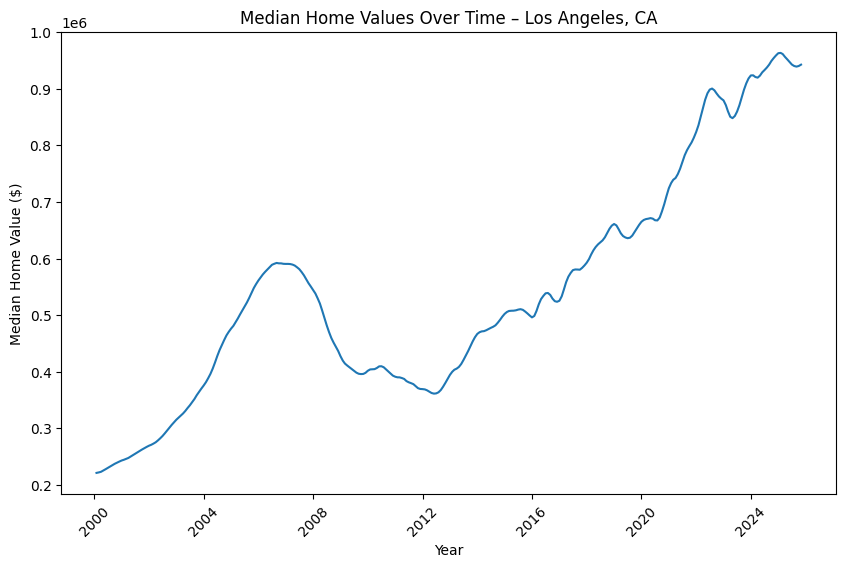

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dates, prices)
plt.title(f"Median Home Values Over Time – {city}")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.xticks(rotation=45)
plt.show()

# Linear Regression of Cities

In [ ]:
growth_rate = (price_data[-1] - price_data[0]) / price_data[0]
growth_rate

np.float64(3.2726978785455056)

In [ ]:
time_numeric = np.arange(len(dates)).reshape(-1, 1)

model = LinearRegression()
model.fit(time_numeric, prices)
predictions = model.predict(time_numeric)

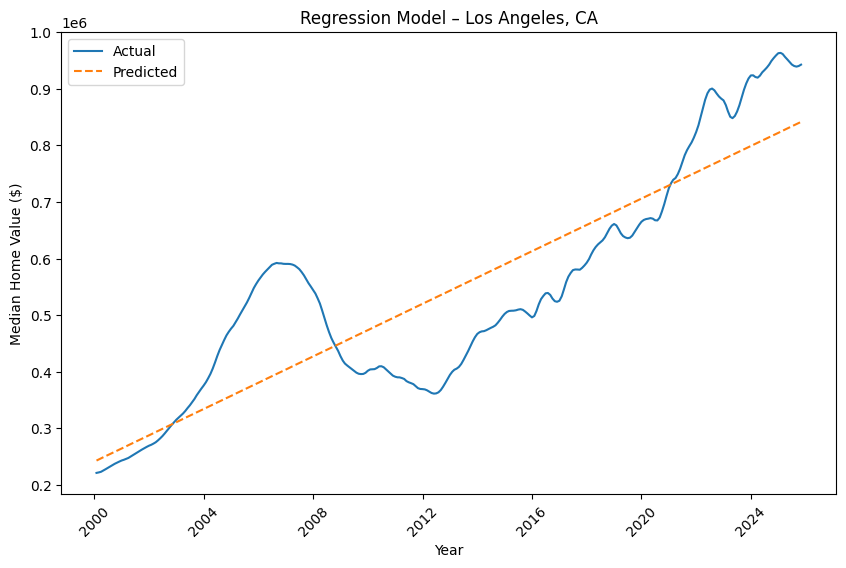

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dates, prices, label="Actual")
plt.plot(dates, predictions, linestyle="dashed", label="Predicted")
plt.title(f"Regression Model – {city}")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
mae = mean_absolute_error(y, y_pred)
mae

86091.7812268361

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

ca_df = df[df["StateName"] == "CA"]
ca_df = ca_df.dropna(thresh=int(0.75 * ca_df.shape[1]))
ca_df = ca_df.fillna(method="ffill")

results = []

for city in cities:
    city_row = ca_df[ca_df["RegionName"] == city]

    if city_row.empty:
        continue

    prices = city_row.iloc[0, 5:].values
    time = np.arange(len(prices)).reshape(-1, 1)

    model = LinearRegression()
    model.fit(time, prices)

    predictions = model.predict(time)
    mae = mean_absolute_error(prices, predictions)

    results.append({
        "City": city,
        "Slope (Growth per Month)": model.coef_[0],
        "Intercept": model.intercept_,
        "Mean Absolute Error": mae
    })

results_df = pd.DataFrame(results)
results_df

/tmp/ipython-input-1658078681.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ca_df = ca_df.fillna(method="ffill")


,City,Slope (Growth per Month),Intercept,Mean Absolute Error
0,"Los Angeles, CA",1915.701306,239189.524942,84940.252011
1,"San Francisco, CA",2661.553626,270807.216581,85714.907003
2,"San Diego, CA",1831.895129,228553.130487,92154.473116
3,"San Jose, CA",3612.940720,250289.348737,138715.023683
4,"Sacramento, CA",1067.186938,195502.747011,67025.955954
5,"Fresno, CA",721.711070,123225.233061,48584.899601


In [ ]:
results_df.sort_values(by="Slope (Growth per Month)", ascending=False)

,City,Slope (Growth per Month),Intercept,Mean Absolute Error
3,"San Jose, CA",3612.940720,250289.348737,138715.023683
1,"San Francisco, CA",2661.553626,270807.216581,85714.907003
0,"Los Angeles, CA",1915.701306,239189.524942,84940.252011
2,"San Diego, CA",1831.895129,228553.130487,92154.473116
4,"Sacramento, CA",1067.186938,195502.747011,67025.955954
5,"Fresno, CA",721.711070,123225.233061,48584.899601


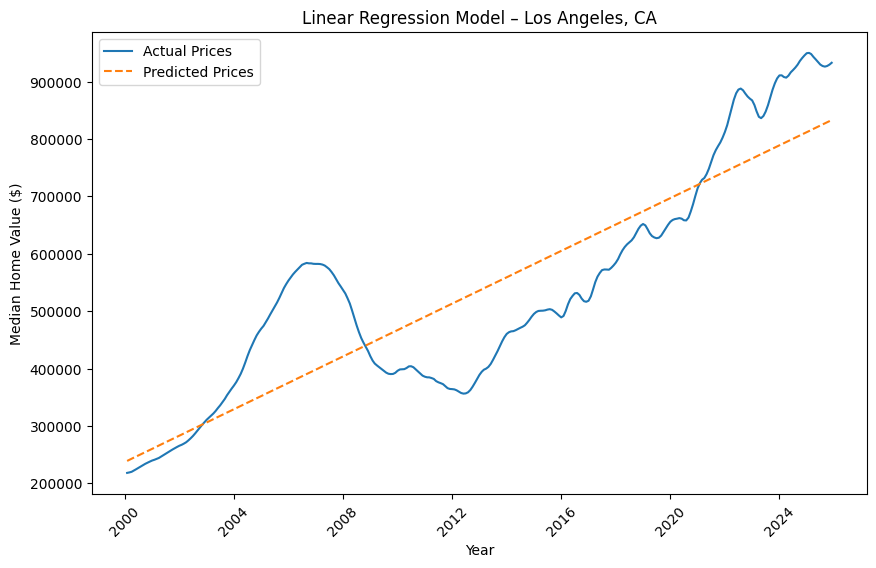

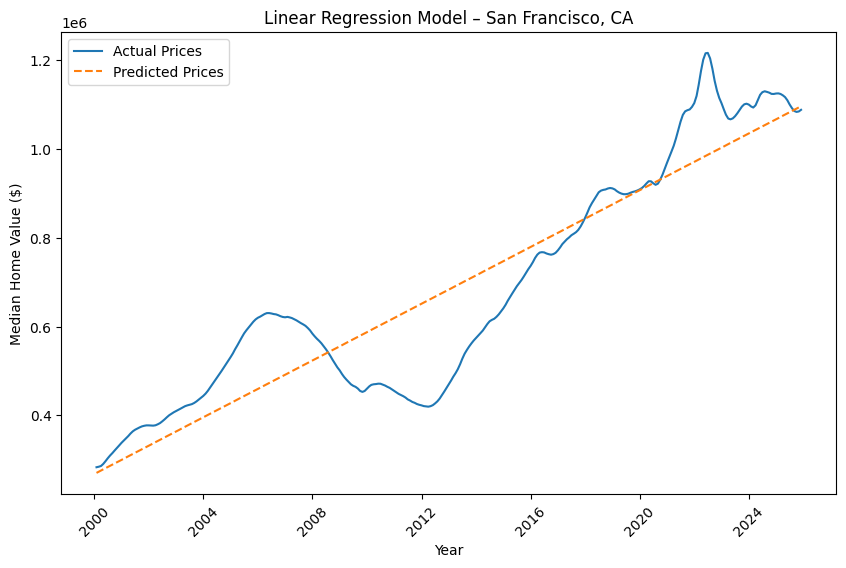

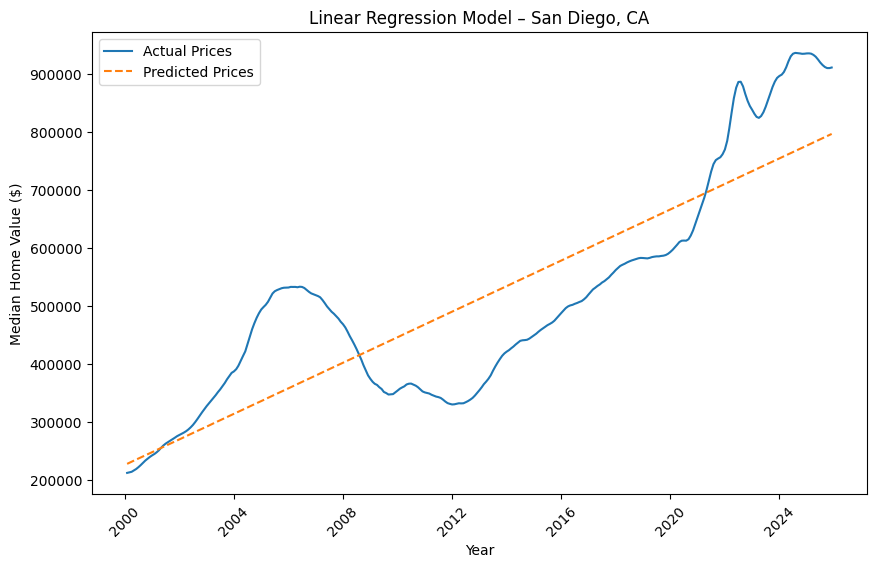

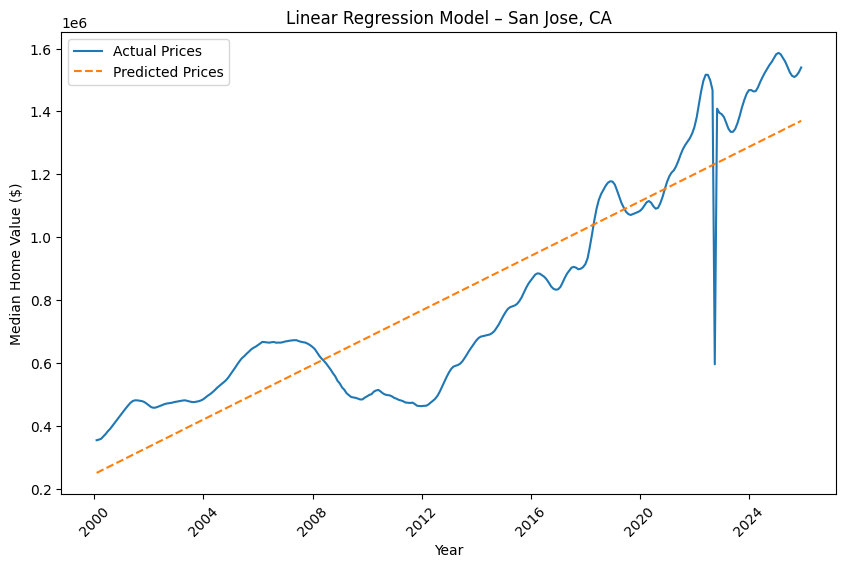

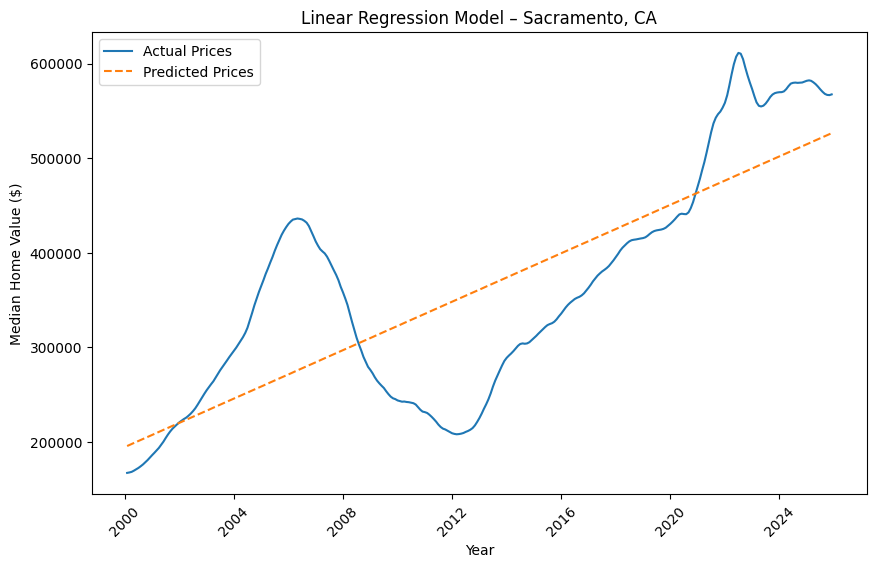

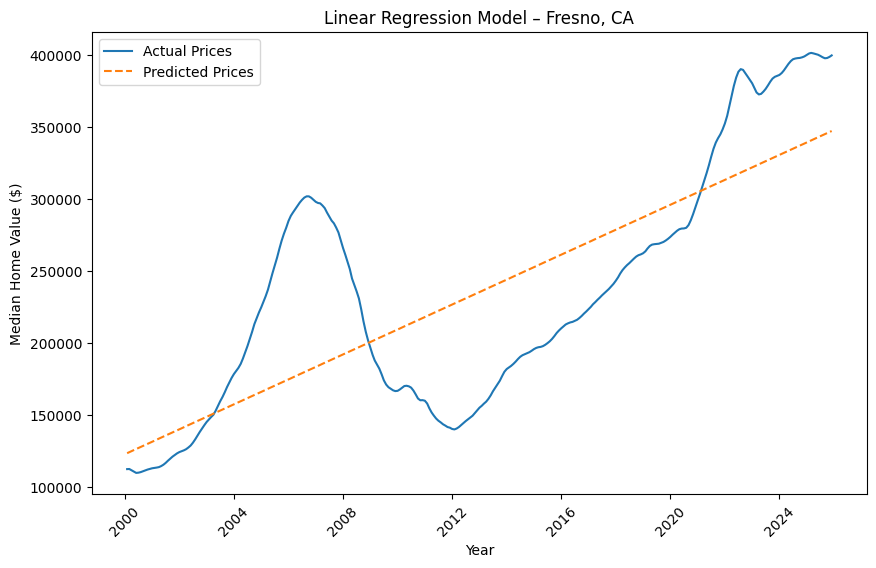

In [86]:
regression_results = []

for city in cities:
    city_row = ca_df[ca_df["RegionName"] == city]

    if city_row.empty:
        continue

    date_columns_city = city_row.columns[5:]
    dates_city = pd.to_datetime(date_columns_city)
    time_numeric_city = np.arange(len(dates_city)).reshape(-1, 1)

    prices = city_row.iloc[0, 5:].values

    model = LinearRegression()
    model.fit(time_numeric_city, prices)
    predictions = model.predict(time_numeric_city)

    mae = mean_absolute_error(prices, predictions)

    regression_results.append({
        "City": city,
        "Monthly Growth Rate ($)": model.coef_[0],
        "Intercept": model.intercept_,
        "Mean Absolute Error": mae
    })

    plt.figure(figsize=(10,6))
    plt.plot(dates_city, prices, label="Actual Prices")
    plt.plot(dates_city, predictions, linestyle="dashed", label="Predicted Prices")
    plt.title(f"Linear Regression Model – {city}")
    plt.xlabel("Year")
    plt.ylabel("Median Home Value ($)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

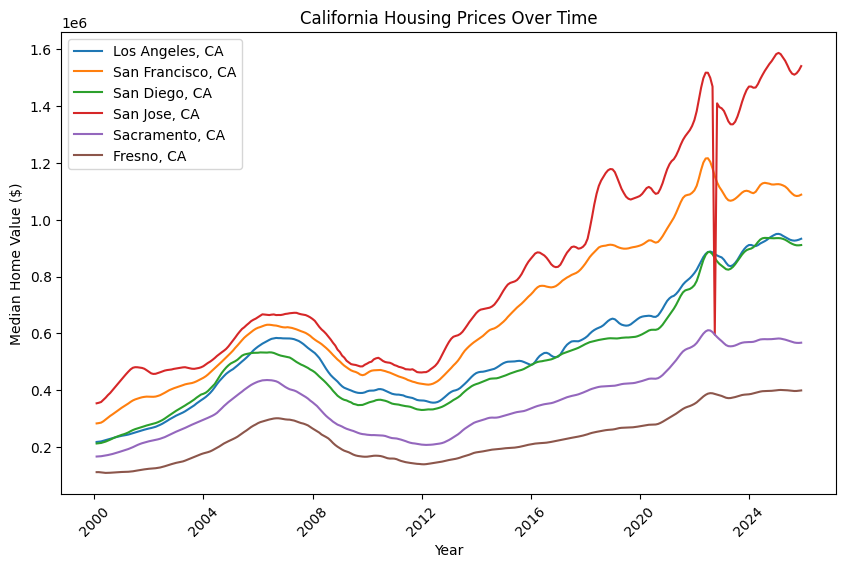

In [87]:
plt.figure(figsize=(10,6))

for city in cities:
    city_row = ca_df[ca_df["RegionName"] == city]

    if city_row.empty:
        continue

    city_data_slice = city_row.iloc[0, 5:]

    dates_city = pd.to_datetime(city_data_slice.index)
    prices = city_data_slice.values

    plt.plot(dates_city, prices, label=city)

plt.title("California Housing Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Median Home Value ($)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [88]:
growth_data = []

for city in cities:
    city_row = ca_df[ca_df["RegionName"] == city]
    if not city_row.empty:
        prices = city_row.iloc[0, 5:].values
        growth = (prices[-1] - prices[0]) / prices[0]
        growth_data.append({
            "City": city,
            "Growth Rate": growth
        })

growth_df = pd.DataFrame(growth_data)
growth_df

,City,Growth Rate
0,"Los Angeles, CA",3.272698
1,"San Francisco, CA",2.836872
2,"San Diego, CA",3.276205
3,"San Jose, CA",3.347159
4,"Sacramento, CA",2.395492
5,"Fresno, CA",2.561548


In [89]:
growth_df.sort_values(by="Growth Rate", ascending=False)

,City,Growth Rate
3,"San Jose, CA",3.347159
2,"San Diego, CA",3.276205
0,"Los Angeles, CA",3.272698
1,"San Francisco, CA",2.836872
5,"Fresno, CA",2.561548
4,"Sacramento, CA",2.395492


# Polynomial Regression:

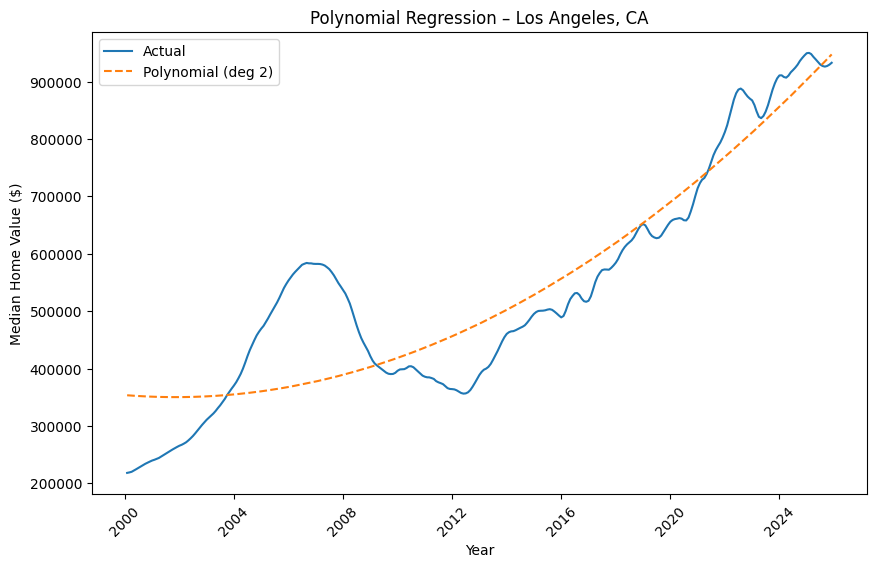

Los Angeles, CA Polynomial MAE: 66565.20


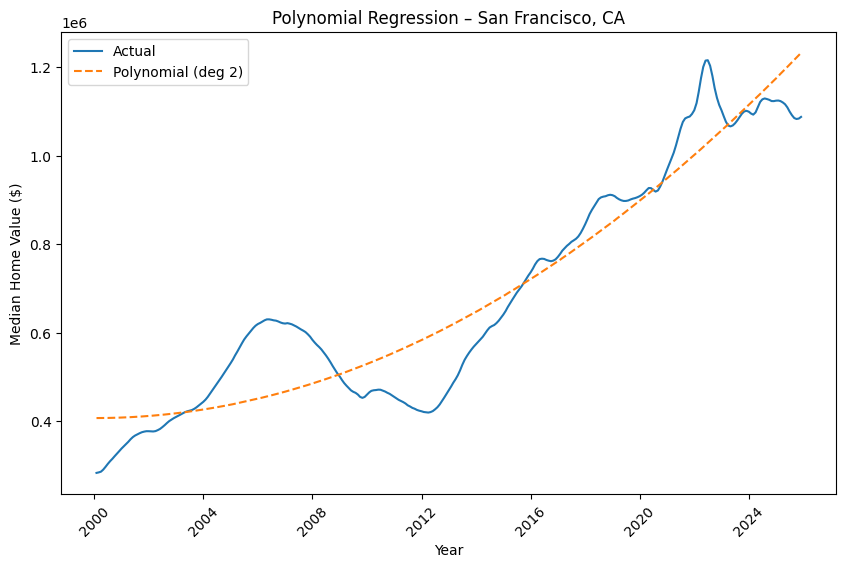

San Francisco, CA Polynomial MAE: 69615.89


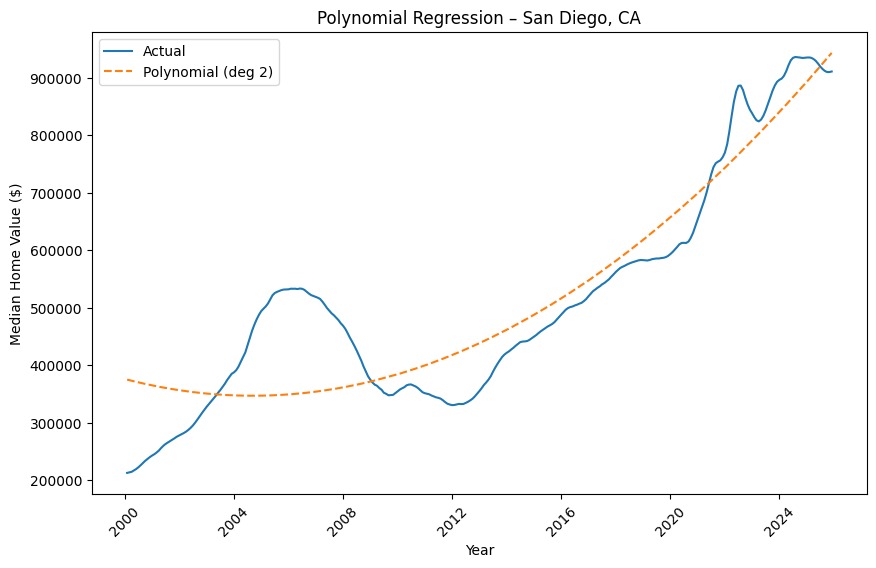

San Diego, CA Polynomial MAE: 65398.52


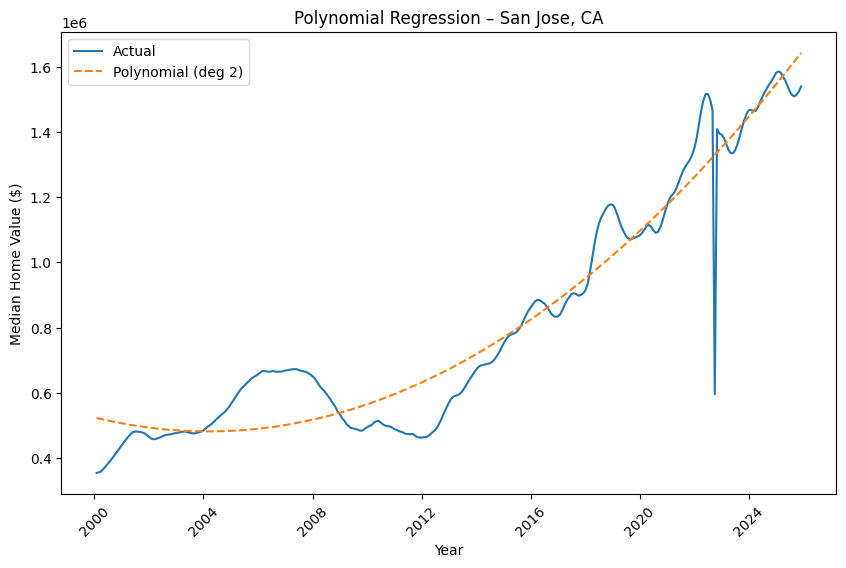

San Jose, CA Polynomial MAE: 73098.89


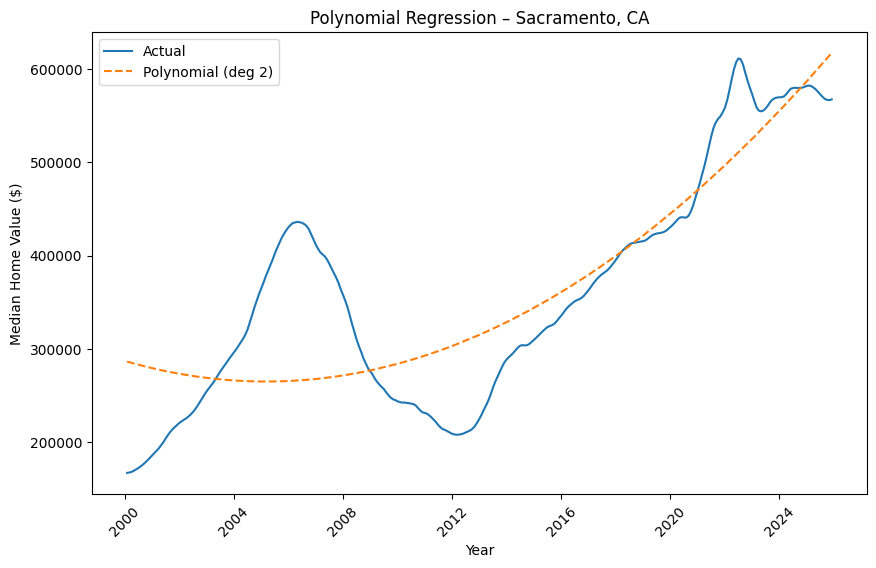

Sacramento, CA Polynomial MAE: 52137.42


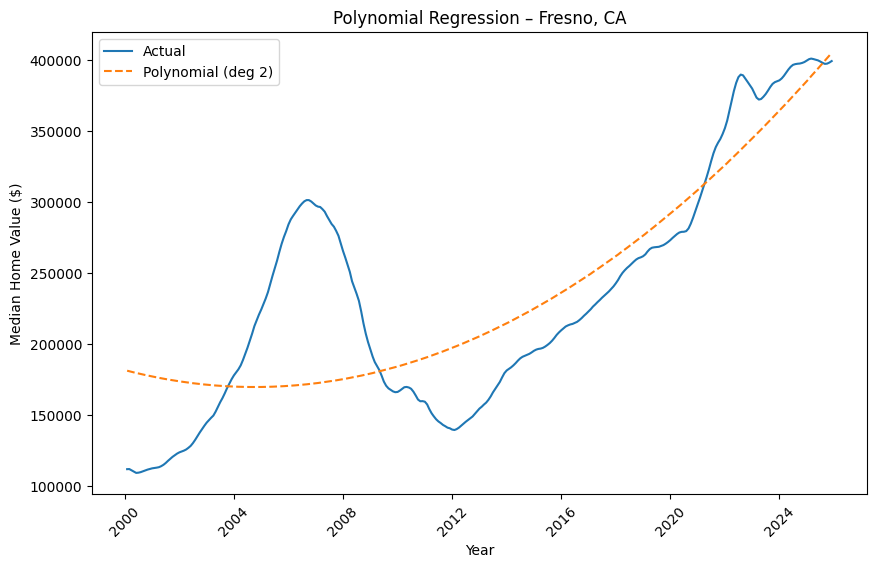

Fresno, CA Polynomial MAE: 39560.77


In [94]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2

for city in cities:
    city_row = ca_df[ca_df["RegionName"] == city]
    if city_row.empty:
        continue

    prices = city_row.iloc[0, 5:].values


    time_numeric_city = np.arange(len(prices)).reshape(-1, 1)
    date_columns_city = city_row.columns[5:]
    dates_city = pd.to_datetime(date_columns_city)

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(time_numeric_city)

    model = LinearRegression()
    model.fit(X_poly, prices)
    predictions = model.predict(X_poly)

    mae = mean_absolute_error(prices, predictions)

    plt.figure(figsize=(10,6))
    plt.plot(dates_city, prices, label="Actual")
    plt.plot(dates_city, predictions, linestyle="dashed", label=f"Polynomial (deg {degree})")
    plt.title(f"Polynomial Regression – {city}")
    plt.xlabel("Year")
    plt.ylabel("Median Home Value ($)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    print(f"{city} Polynomial MAE: {mae:.2f}")

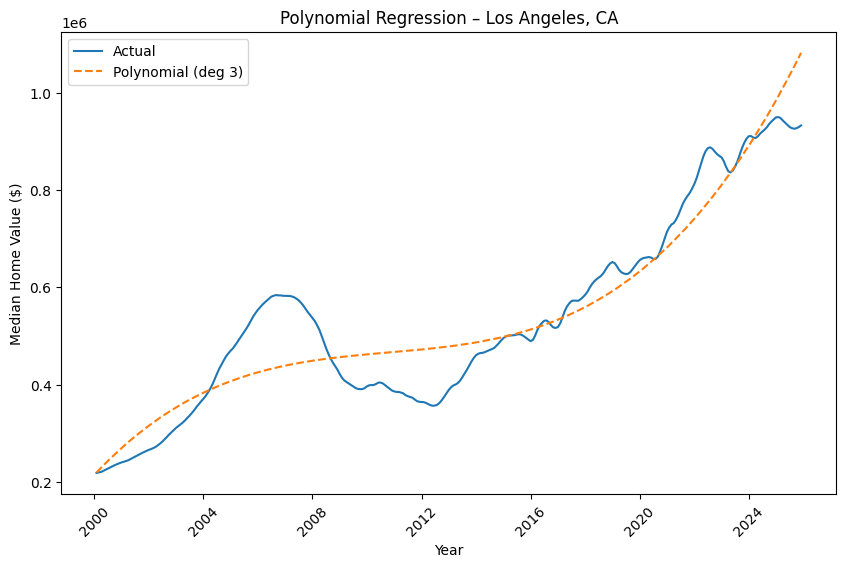

Los Angeles, CA Polynomial MAE: 52587.38


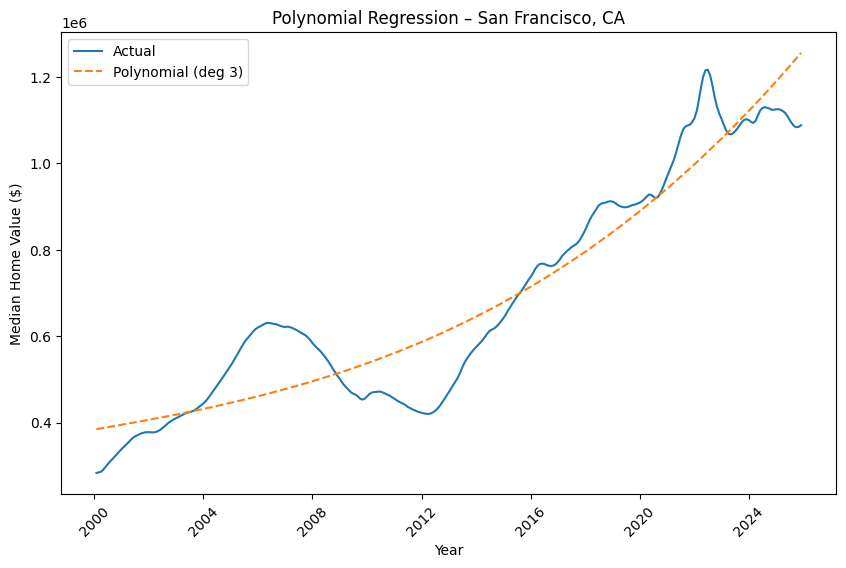

San Francisco, CA Polynomial MAE: 70378.67


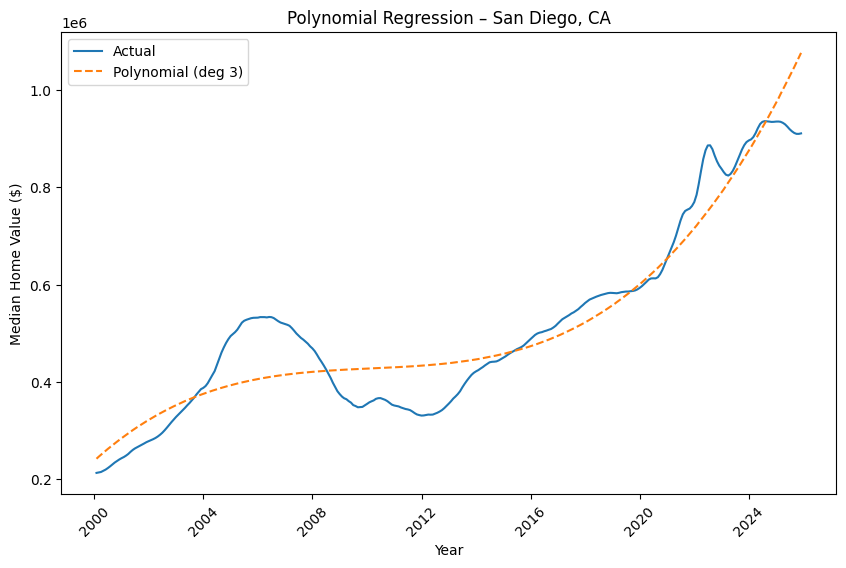

San Diego, CA Polynomial MAE: 50236.16


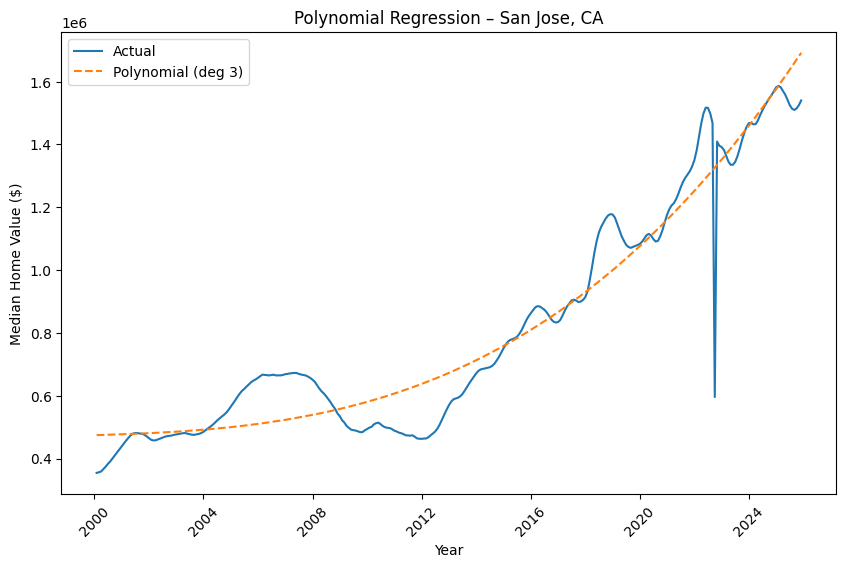

San Jose, CA Polynomial MAE: 70588.18


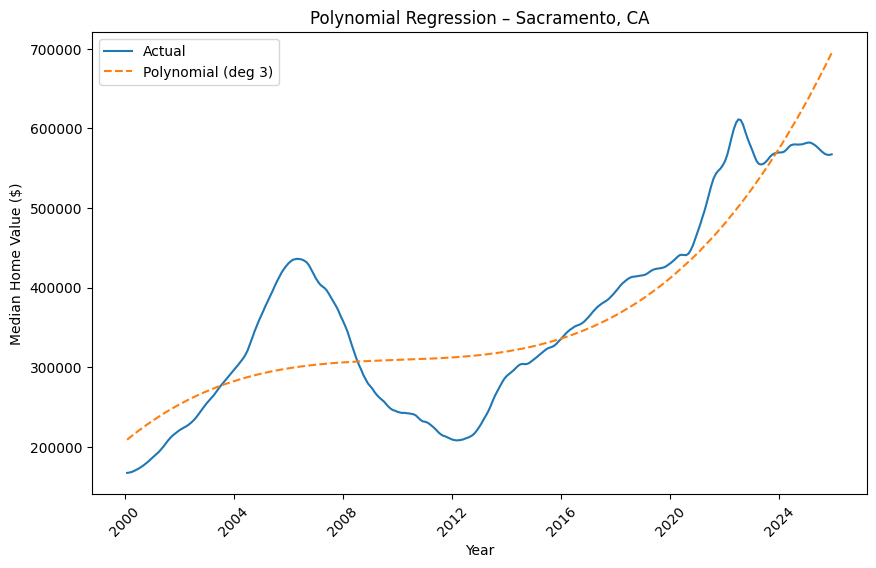

Sacramento, CA Polynomial MAE: 49606.41


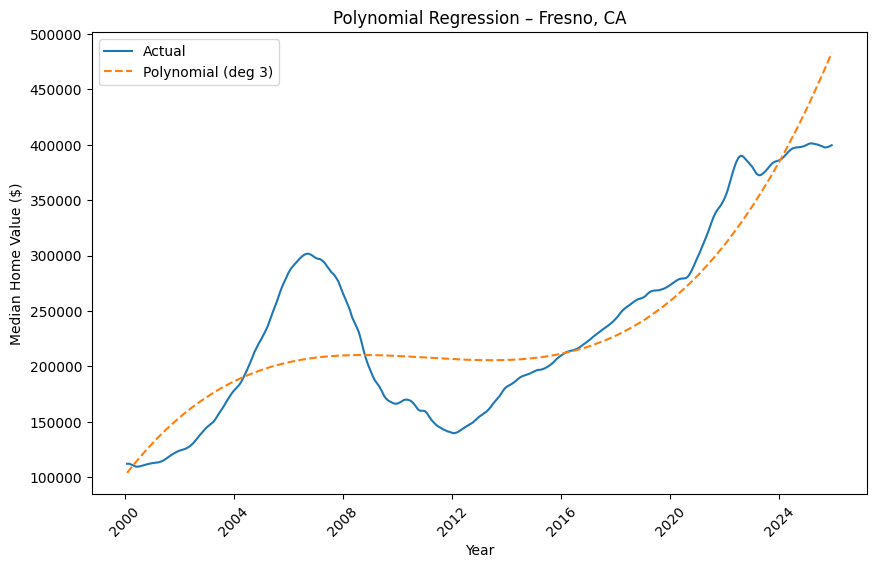

Fresno, CA Polynomial MAE: 32189.55


In [99]:
degree = 3

for city in cities:
    city_row = ca_df[ca_df["RegionName"] == city]
    if city_row.empty:
        continue

    prices = city_row.iloc[0, 5:].values


    time_numeric_city = np.arange(len(prices)).reshape(-1, 1)
    date_columns_city = city_row.columns[5:]
    dates_city = pd.to_datetime(date_columns_city)

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(time_numeric_city)

    model = LinearRegression()
    model.fit(X_poly, prices)
    predictions = model.predict(X_poly)

    mae = mean_absolute_error(prices, predictions)

    plt.figure(figsize=(10,6))
    plt.plot(dates_city, prices, label="Actual")
    plt.plot(dates_city, predictions, linestyle="dashed", label=f"Polynomial (deg {degree})")
    plt.title(f"Polynomial Regression – {city}")
    plt.xlabel("Year")
    plt.ylabel("Median Home Value ($)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    print(f"{city} Polynomial MAE: {mae:.2f}")

# Rolling Average Trend/Smoothing Model:

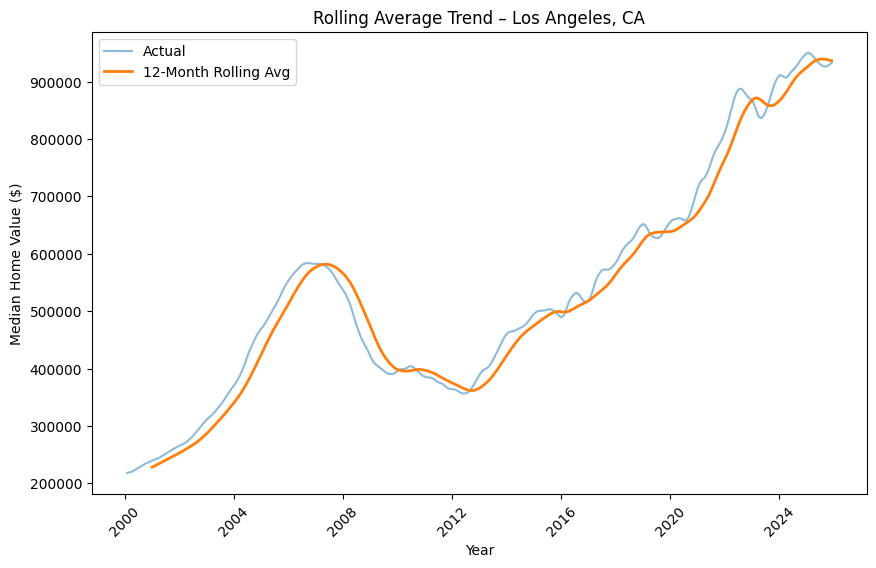

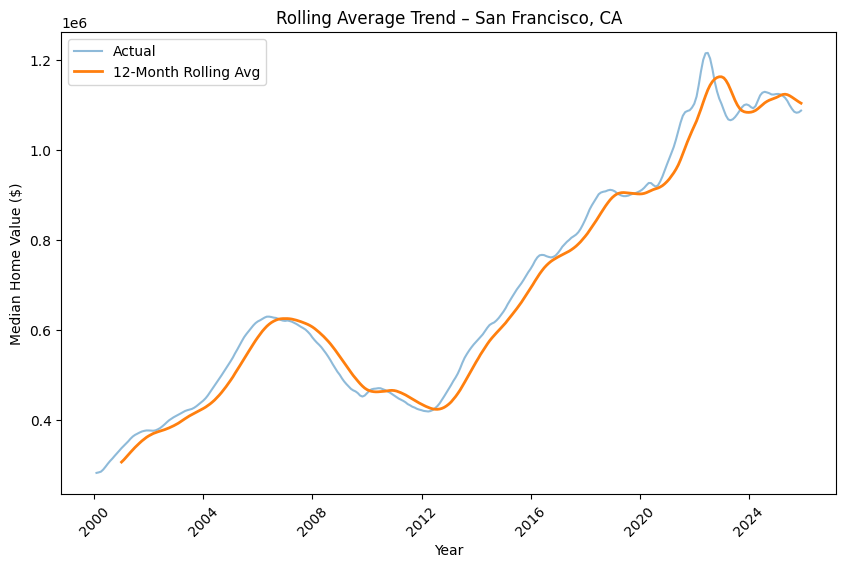

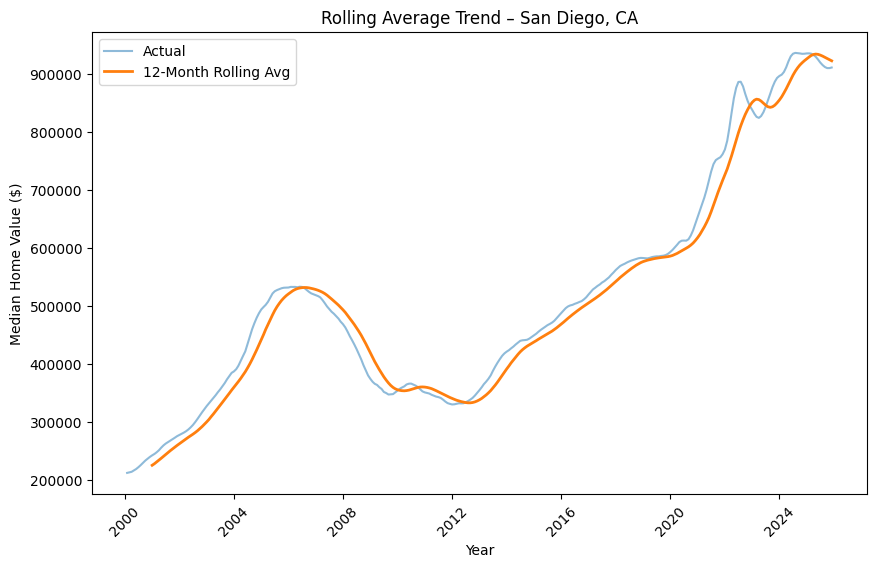

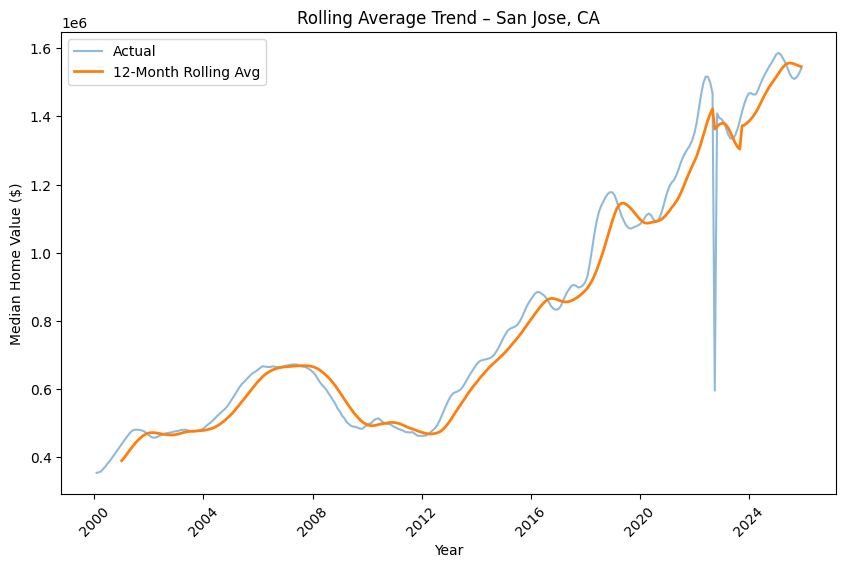

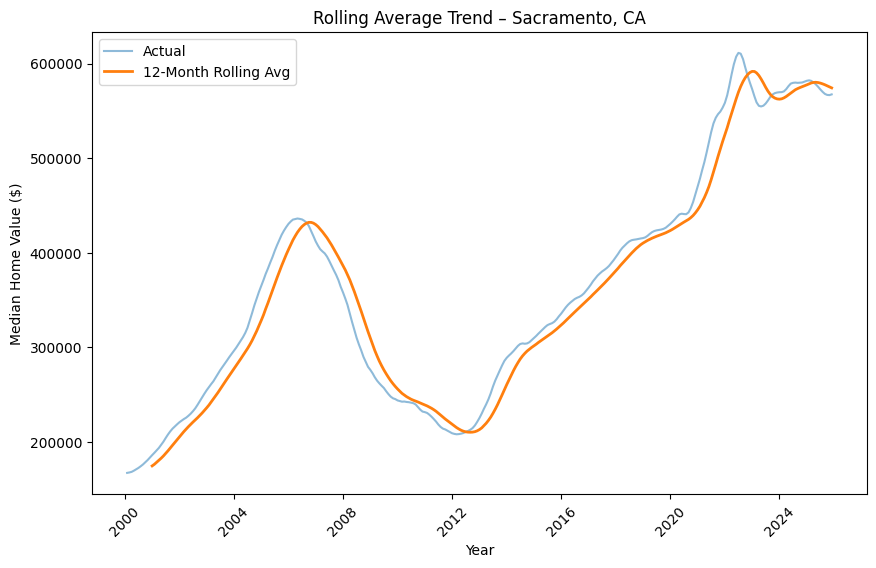

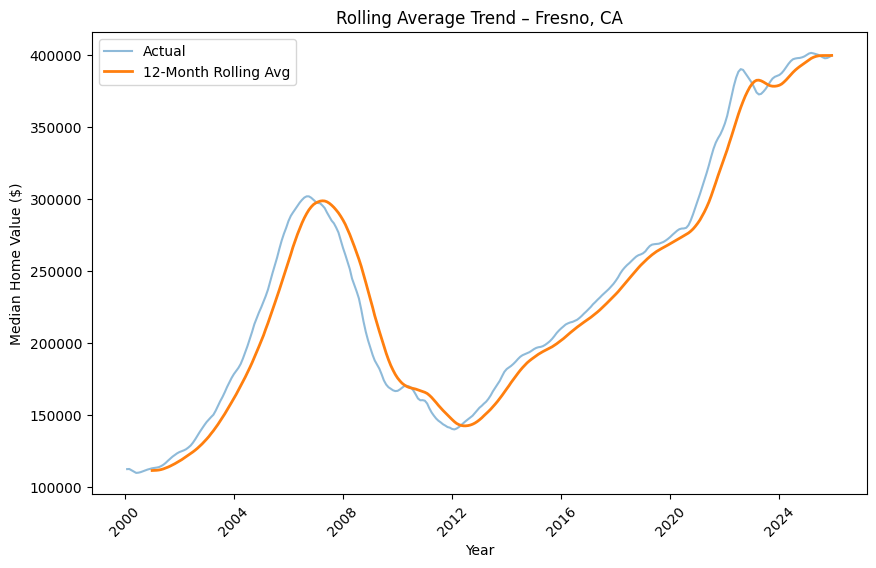

In [96]:
window = 12

for city in cities:
    city_row = ca_df[ca_df["RegionName"] == city]
    if city_row.empty:
        continue

    prices = pd.Series(city_row.iloc[0, 5:].values)

    date_columns_city = city_row.columns[5:]
    dates_city = pd.to_datetime(date_columns_city)

    rolling_avg = prices.rolling(window=window).mean()

    plt.figure(figsize=(10,6))
    plt.plot(dates_city, prices, alpha=0.5, label="Actual")
    plt.plot(dates_city, rolling_avg, linewidth=2, label="12-Month Rolling Avg")
    plt.title(f"Rolling Average Trend – {city}")
    plt.xlabel("Year")
    plt.ylabel("Median Home Value ($)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()